In [1]:
#!/usr/bin/env python3

from __future__ import print_function, division
import numpy as np
import pandas as pd
from scipy.interpolate import griddata, interp1d
from pprz_data.pprz_data import DATA

In [2]:
import matplotlib
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.style.use('default')
import seaborn #plotting lib, but just adding makes the matplotlib plots look better

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [19]:
ac_id = '9'
# filename = '../data/jumper_1st.data'
filename = '../data/jumper_2nd.data'
data = DATA(filename, ac_id, data_type='fault')

Min time : 30.608 Maximum time : 571.584


In [20]:
# Labelled data can be built from the data class directly
df_labelled = data.get_labelled_data()
df_labelled.describe()

,phi,psi,theta,mode,Ax,Ay,Az,east,north,course,alt,vel,climb,Gx,Gy,Gz,m1,m2,add1,add2
count,52109.000000,52109.000000,52109.000000,52109.000000,52109.000000,52109.000000,52109.000000,5.210900e+04,5.210900e+04,52109.000000,52109.000000,52109.000000,52109.000000,52109.000000,52109.000000,52109.000000,30676.000000,30676.000000,30676.0,30676.0
mean,0.238643,-0.546117,-0.014750,1.222706,1.706414,0.010337,-11.645403,3.603380e+07,4.813679e+08,1865.204012,232.854487,982.842021,10.144810,-0.022861,0.191684,0.144609,0.792652,0.934281,0.0,0.0
std,0.414992,1.542062,0.161421,0.889098,1.760371,1.841402,4.546843,5.798637e+03,4.687061e+03,1148.250571,33.357248,678.457588,219.849137,0.390530,0.394136,0.365726,0.371144,0.219677,0.0,0.0
min,-3.089806,-3.137948,-1.412579,0.000000,-77.791016,-12.500733,-78.655273,3.602396e+07,4.813605e+08,0.000000,177.957590,1.080000,-1971.860000,-3.829590,-6.194824,-4.670533,0.000000,0.200000,0.0,0.0
25%,-0.003068,-1.623691,-0.099637,0.000000,0.787720,-0.802368,-12.585938,3.602890e+07,4.813642e+08,810.320000,187.961980,455.270000,-25.240000,-0.173859,0.023682,-0.001404,1.000000,1.000000,0.0,0.0
50%,0.170439,-1.012060,-0.002220,2.000000,1.612793,0.073608,-10.528930,3.603219e+07,4.813681e+08,2103.020000,254.225720,928.880000,27.170000,-0.043671,0.114899,0.123291,1.000000,1.000000,0.0,0.0
75%,0.476194,0.910981,0.048747,2.000000,2.382446,0.931519,-9.770020,3.603725e+07,4.813713e+08,2879.120000,261.411720,1451.720000,93.610000,0.114471,0.322449,0.343567,1.000000,1.000000,0.0,0.0
max,3.068133,3.140249,0.683918,2.000000,33.517700,12.909180,5.368286,3.605636e+07,4.813765e+08,3597.640000,268.417170,2616.310000,600.870000,3.559994,3.238434,3.353699,1.000000,1.000000,0.0,0.0


In [105]:
# df_labelled.columns
df_labelled.phi[254.3280:297.6720]

time
254.328    0.862924
254.330    0.859917
254.340    0.856909
254.350    0.853902
254.360    0.849904
             ...   
297.640    0.801463
297.650    0.802816
297.660    0.803952
297.670    0.805088
297.672    0.805088
Name: phi, Length: 4337, dtype: float64

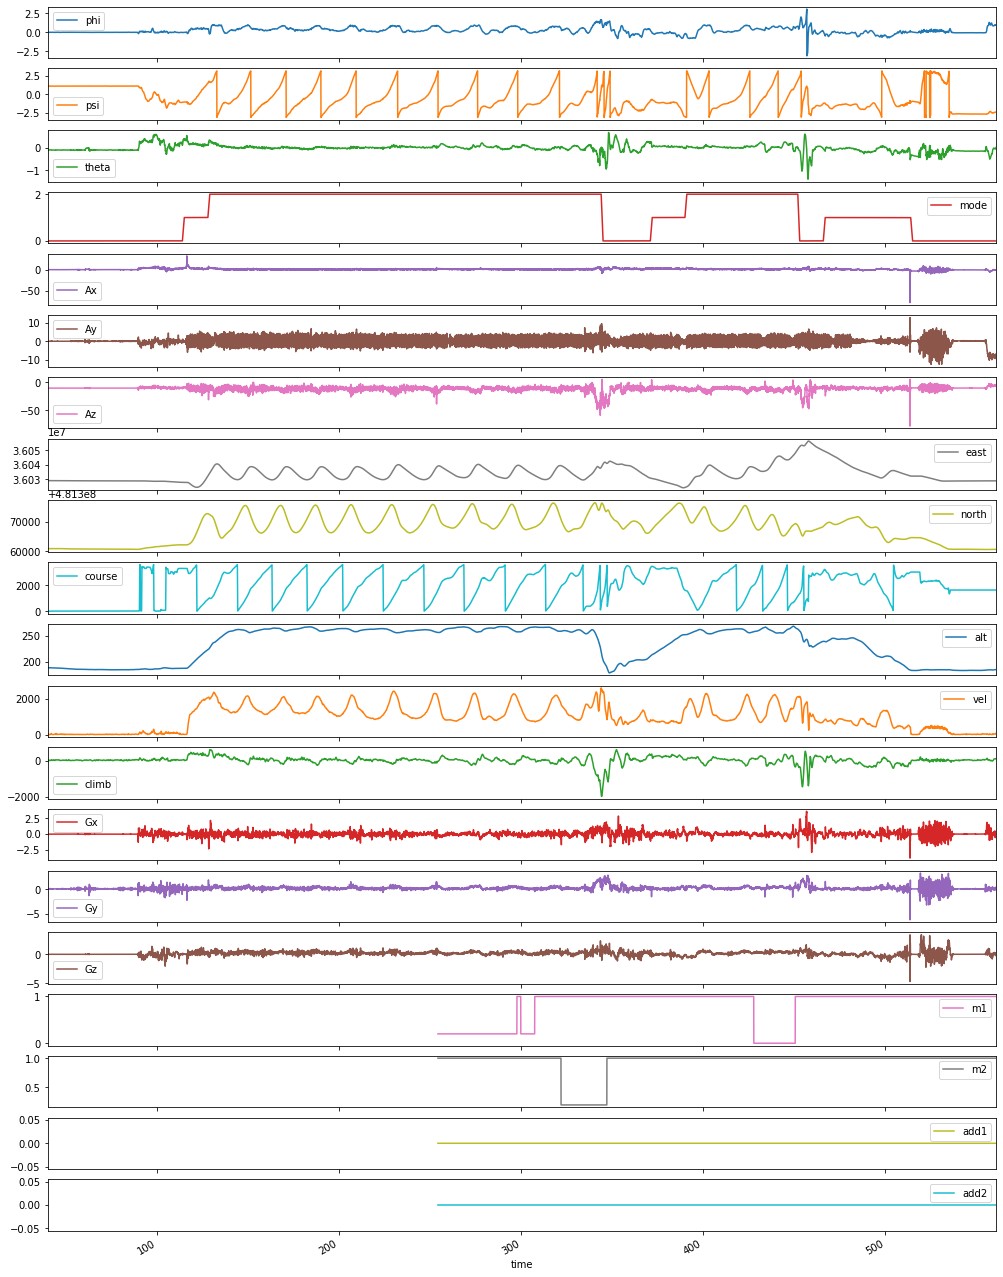

In [22]:
df_labelled.plot(subplots=True, figsize=(17,25));plt.show()

# Select and filter a part of the flight 

In [23]:
labeled_data = df_labelled[300:500]

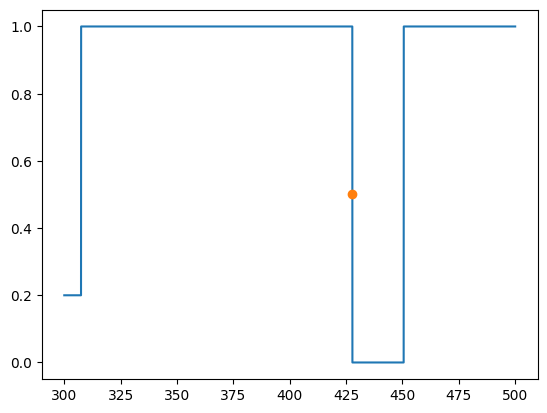

In [78]:
m1 = labeled_data.m1.values
time = labeled_data.index.values
plt.plot(time,m1);plt.plot([427.7640],[0.5], "o");plt.show()


In [82]:
# labeled_data.plot(subplots=True, figsize=(17,25));plt.show()

In [27]:
df_flight = labeled_data.copy()
df_flight = df_flight.assign(fault = 0)
cond1 = (df_flight['add1'] > 0.005) | (df_flight['add1'] < -0.005)
cond2 = (df_flight['add2'] > 0.005) | (df_flight['add2'] < -0.005)
cond3 = (df_flight['m1'] < 1.0) | (df_flight['m2'] < 1.0)
cond = cond1 | cond2 | cond3
df_flight.loc[cond, 'fault'] = 1
cond4 = (df_flight['mode'] == 2.0) 
# cond2 = (df_flight['mode'] == 1.0)
cond = cond4 # | cond2
df_flight = df_flight[cond]

In [29]:
# df_flight.plot(subplots=True, figsize=(17,25));plt.show()

In [ ]:
df_flight[(df_flight['alt'] < 230 )].alt.idxmax() # Check this out!

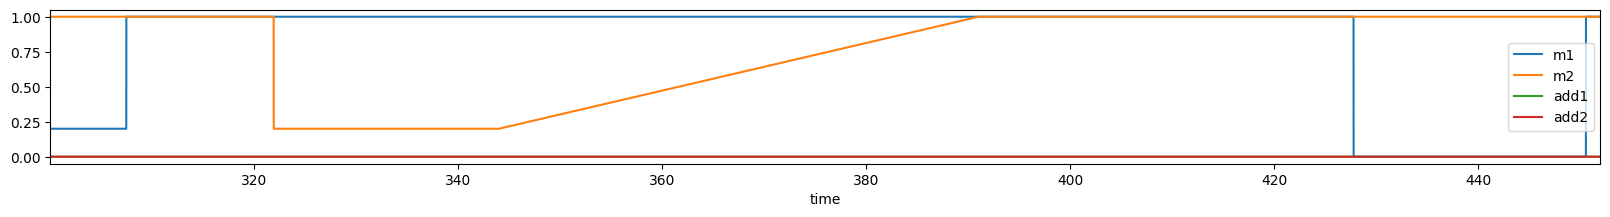

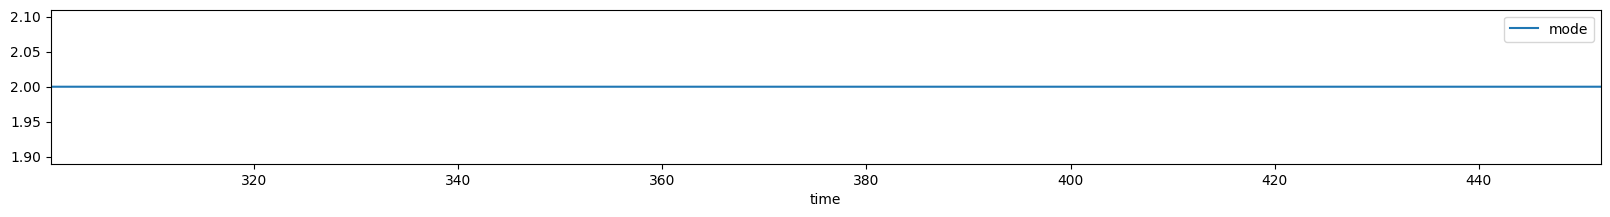

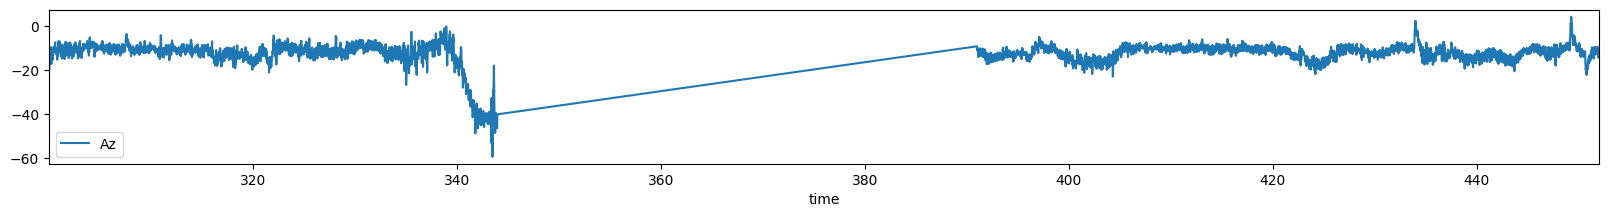

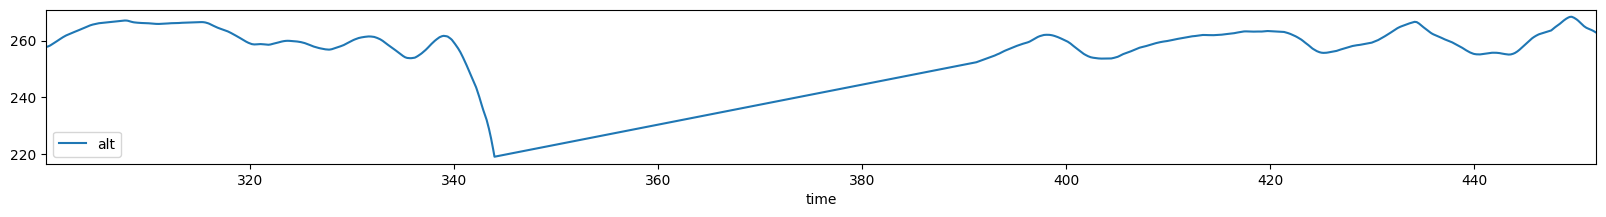

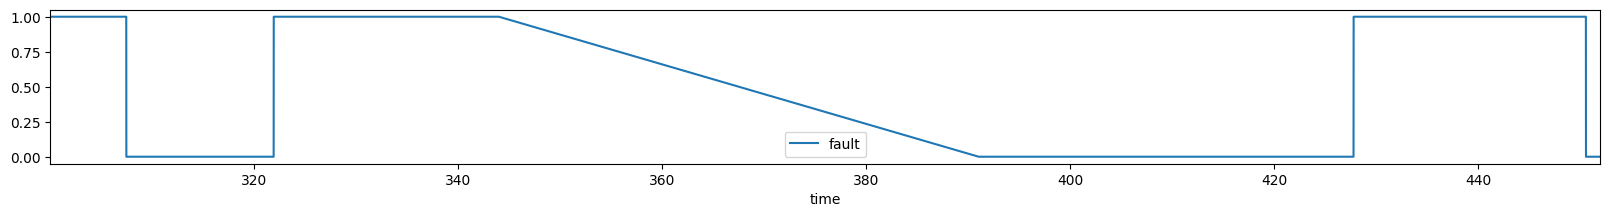

In [33]:
import matplotlib as mpl
mpl.style.use('default') #seaborn, default, seaborn-paper
# with plt.xkcd():
# fig = plt.figure(figsize=(20, 8), dpi=90)
st=300; fn=500
df_flight[st:fn].plot(y=['m1','m2','add1','add2'], figsize=(20,2))
# labeled_data.plot(y=['mode'], figsize=(20,2))
df_flight[st:fn].plot(y=['mode'], figsize=(20,2))
df_flight[st:fn].plot(y=['Az'], figsize=(20,2))
df_flight[st:fn].plot(y=['alt'], figsize=(20,2))
df_flight[st:fn].plot(y=['fault'],figsize=(20,2));plt.show()

In [37]:
# We have selected manually a part of the flight
st=395; fn=450
# df_flight[st:fn]
flight = df_flight[st:fn]
flight.describe()
# Re-run teh above cell if you want

,phi,psi,theta,mode,Ax,Ay,Az,east,north,course,...,vel,climb,Gx,Gy,Gz,m1,m2,add1,add2,fault
count,5501.000000,5501.000000,5501.000000,5501.0,5501.000000,5501.000000,5501.000000,5.501000e+03,5.501000e+03,5501.000000,...,5501.000000,5501.000000,5501.000000,5501.000000,5501.000000,5501.000000,5501.0,5501.0,5501.0,5501.000000
mean,0.431438,-0.429651,0.044191,2.0,1.959143,0.137611,-12.010821,3.603702e+07,4.813700e+08,1643.266355,...,1336.281058,26.901476,-0.036948,0.249877,0.289587,0.595528,1.0,0.0,0.0,0.404472
std,0.338805,1.486832,0.083366,0.0,0.630980,1.517101,2.854237,4.764579e+03,2.855661e+03,1091.825236,...,497.263739,149.922874,0.281288,0.247618,0.208092,0.490834,0.0,0.0,0.0,0.490834
min,-0.768320,-3.119526,-0.203772,2.0,-0.110108,-4.041016,-22.990113,3.603025e+07,4.813652e+08,9.400000,...,681.040000,-306.760000,-1.154145,-1.629822,-0.553223,0.000000,1.0,0.0,0.0,0.000000
25%,0.178037,-1.499729,0.001895,2.0,1.524536,-0.924316,-13.862304,3.603278e+07,4.813675e+08,590.160000,...,876.610000,-71.960000,-0.179261,0.081452,0.159790,0.000000,1.0,0.0,0.0,0.000000
50%,0.457844,-0.603438,0.026988,2.0,1.931152,0.081543,-11.556885,3.603641e+07,4.813694e+08,1629.680000,...,1205.280000,54.620000,-0.045471,0.226562,0.299927,1.000000,1.0,0.0,0.0,0.000000
75%,0.685748,0.539996,0.072294,2.0,2.388672,1.166748,-10.158325,3.603956e+07,4.813723e+08,2598.770000,...,1746.880000,123.460000,0.086182,0.424835,0.441284,1.000000,1.0,0.0,0.0,1.000000
max,0.977631,3.133142,0.259080,2.0,4.173828,4.567383,4.080811,3.604706e+07,4.813756e+08,3589.880000,...,2303.760000,342.970000,1.464844,0.981689,0.911438,1.000000,1.0,0.0,0.0,1.000000


# Do some CLASSIFICATION !

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn import svm

In [39]:
def add_time_history(X,y,n_step=3):
    time_len= X.shape[0] #-n_step
    column_len = X.shape[1]

    xx=np.zeros((time_len,column_len*n_step))

    for i in range(n_step, time_len):
        for j in range(n_step):
            xx[i,j*column_len:(j+1)*column_len] = X[i-j]
            
    xx = xx[n_step:X.shape[0],:]
    yy = y[n_step:]
    
    return xx,yy

In [40]:
# Create the Feature and Label List
columns=['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
st=395; fn=450
flight = df_flight[st:fn].copy()

# flight['Az'] = flight['Az']+9.81
X_pre = flight[columns].values # Features
y_pre = flight.fault.values   # Labels
# n_step = 3 # time history step that we would like to add
X,y = add_time_history(X_pre,y_pre,n_step=10)

# # Define the scaler and Scale it
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# # y = scaler.fit_transform(y)

# Train, Test, Validation Sets Splits
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Stratified Split if we want to make CrossValidation
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=42)
# sss.get_n_splits(X, y)

In [51]:
# Just to see how does it look like
# plt.plot(X[1000:1002,0:10]);plt.show()

# Start with an easy model

In [52]:
# SVM Classifier model
clf = SVC(kernel="rbf", C=1.0) #C=float("inf")) kernel="linear"

# Fit the scaled data
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
predict_test = clf.predict(X_test)

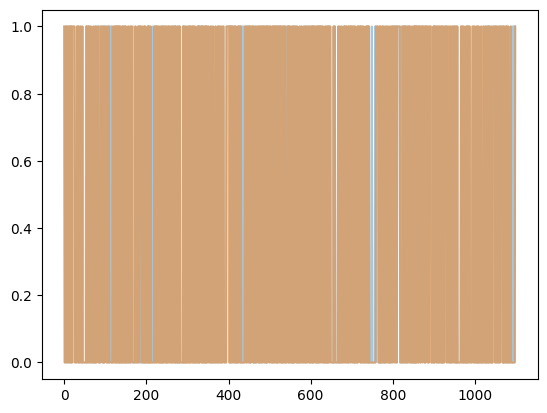

In [57]:
plt.plot(predict_test, alpha=0.4);plt.plot(y_test, alpha=0.5);plt.show()

In [62]:
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
clf.fit(X_train_trans, y_train)
X_test_trans = scaler.transform(X_test)
predict_test = clf.predict(X_test_trans)
# X_val_transformed = scaler.transform(X_val)
# y_pred = clf.predict(X_val_transformed)

In [61]:
# from sklearn.metrics import classification_report
target_names = ['nominal', 'faulty']
print(classification_report(y_test, predict_test, target_names=target_names))

              precision    recall  f1-score   support

     nominal       0.97      0.93      0.95       643
      faulty       0.91      0.96      0.93       456

    accuracy                           0.94      1099
   macro avg       0.94      0.95      0.94      1099
weighted avg       0.94      0.94      0.94      1099



In [58]:
from sklearn.metrics import classification_report
target_names = ['nominal', 'faulty']
print(classification_report(y_test, predict_test, target_names=target_names))

              precision    recall  f1-score   support

     nominal       0.96      0.88      0.92       643
      faulty       0.85      0.95      0.90       456

    accuracy                           0.91      1099
   macro avg       0.91      0.92      0.91      1099
weighted avg       0.92      0.91      0.91      1099



In [59]:
full_flight_predict = clf.predict(X_test)
# plt.plot(full_flight_predict);plt.show()
print(classification_report(y, full_flight_predict, target_names=target_names))

              precision    recall  f1-score   support

     nominal       0.97      0.91      0.94      3266
      faulty       0.87      0.95      0.91      2225

    accuracy                           0.93      5491
   macro avg       0.92      0.93      0.92      5491
weighted avg       0.93      0.93      0.93      5491



In [63]:
X_trans = scaler.transform(X)
full_flight_predict = clf.predict(X_trans)
# plt.plot(full_flight_predict);plt.show()
print(classification_report(y, full_flight_predict, target_names=target_names))

              precision    recall  f1-score   support

     nominal       0.98      0.94      0.96      3266
      faulty       0.92      0.96      0.94      2225

    accuracy                           0.95      5491
   macro avg       0.95      0.95      0.95      5491
weighted avg       0.95      0.95      0.95      5491



In [64]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

clf = SVC(kernel='rbf', gamma='auto', C=35).fit(X_train_transformed, y_train)
# clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cv = ShuffleSplit(n_splits=5, test_size=0.3 , random_state=42)


# scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5) # default is accuracy
# print(scores)
# print("Accuracy: %0.2f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_test_transformed, y_test, scoring='accuracy', cv=cv) # default is accuracy, f1_macro, roc_auc_score
print(scores)
print("Accuracy: %0.2f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_test_transformed, y_test, scoring='f1_macro', cv=cv)
print(scores)
print("F1-Score: %0.2f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

X_transformed = scaler.transform(X)
scores = cross_val_score(clf, X_transformed, y, scoring='f1_macro', cv=cv)
print(scores)
print("F1-Score: %0.2f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

[0.89393939 0.93030303 0.9030303  0.90606061 0.93030303]
Accuracy: 0.91 (+/- 0.030)
[0.88965847 0.92783731 0.8989899  0.90250736 0.92845764]
F1-Score: 0.91 (+/- 0.032)
[0.97535264 0.97933128 0.97790275 0.9754257  0.97432069]
F1-Score: 0.98 (+/- 0.004)


In [65]:
from sklearn.metrics import classification_report
X_val_transformed = scaler.transform(X_val)
y_pred = clf.predict(X_val_transformed)
target_names = ['nominal', 'faulty']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     nominal       0.98      0.98      0.98       538
      faulty       0.96      0.96      0.96       341

    accuracy                           0.97       879
   macro avg       0.97      0.97      0.97       879
weighted avg       0.97      0.97      0.97       879



In [ ]:
# Train another model (above!) and see its performence
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred, target_names=target_names))

In [66]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.771 (+/-0.036) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.297 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.820 (+/-0.021) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.824 (+/-0.025) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.889 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.754 (+/-0.030) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.915 (+/-0.023) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.789 (+/-0.031) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.721 (+/-0.032) for {'C': 1, 'kernel': 'linear'}
0.717 (+/-0.018) for {'C': 10, 'kernel': 'linear'}
0.708 (+/-0.007) for {'C': 100, 'kernel': 'linear'}
0.683 (+/-0.011) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.696 (+/-0.032) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.500 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.828 (+/-0.018) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.699 (+/-0.019) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.897 (+/-0.016) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.710 (+/-0.016) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.917 (+/-0.023) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.793 (+/-0.029) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.686 (+/-0.020) for {'C': 1, 'kernel': 'linear'}
0.685 (+/-0.013) for {'C': 10, 'kernel': 'linear'}
0.681 (+/-0.010) for {'C': 100, 'kernel': 'linear'}
0.669 (+/-0.009) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

In [ ]:
# An example use of pdf saving
a = df0[162000:168000].to_numpy()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
fig = plt.figure(figsize=(20,12))
ax=plt.subplot(711); plt.plot(a[:,1], label='$A_x$');plt.grid();plt.legend();ax.set_xticklabels([]);
ax=plt.subplot(712); plt.plot(a[:,2], label='$A_y$');plt.grid();plt.legend();ax.set_xticklabels([]);
ax=plt.subplot(713); plt.plot(a[:,3], label='$A_z$');plt.grid();plt.legend();ax.set_xticklabels([]);
ax=plt.subplot(714); plt.plot(a[:,4], label='$G_x$');plt.grid();plt.legend();ax.set_xticklabels([]);
ax=plt.subplot(715); plt.plot(a[:,5], label='$G_y$');plt.grid();plt.legend();ax.set_xticklabels([]);
ax=plt.subplot(716); plt.plot(a[:,6], label='$G_z$');plt.grid();plt.legend();ax.set_xticklabels([]);
ax=plt.subplot(717); plt.plot(a[:,7], label='Fault');plt.grid();plt.legend();
plt.xlabel("Time [s]")
plt.ylabel("")
plt.savefig('signal_example.pdf', dpi=200, bbox_inches='tight') # THIS IS IMPORTANT !
plt.show()